# COMS 6998 - Practical Deep Learning System Performance

## Assignment 2
* **Name**: Zach Lawless
* **UNI**: ztl2103

### Problem 1: *Perceptron* (15 points)

Generate data and loss function for the problem.

In [1]:
import numpy as np

X_train = np.random.uniform(size=(20, 2))
y_train = np.where(X_train[:, 0] <= X_train[:, 1], -1, 1)

X_test = np.random.uniform(size=(1000, 2))
y_test = np.where(X_test[:, 0] <= X_test[:, 1], -1, 1)

print(f"Train: X: {X_train.shape}, y: {y_train.shape}")
print(f"Test: X: {X_test.shape}, y: {y_test.shape}")

Train: X: (20, 2), y: (20,)
Test: X: (1000, 2), y: (1000,)


Inspect training data.

(0.0, 1.0)

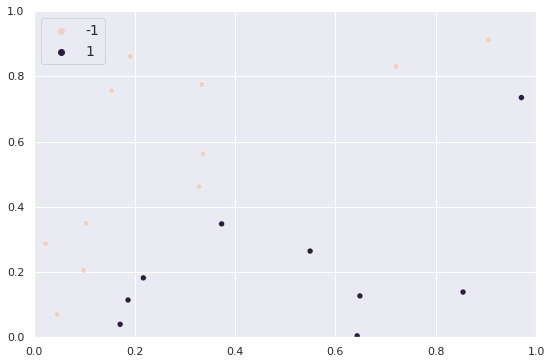

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
plt.legend(fontsize=14)
ax.set_xlim((0, 1))
ax.set_ylim((0, 1))

Define prediction and loss functions.

In [3]:
def y(X, W):
  return np.sign(np.matmul(X, W.T))

def loss(y_hat, a=0):
  return np.max([np.zeros_like(y_hat), a-y_hat])

#### Q1: (6 points)

Learn weights based on training data and Perceptron loss criterion.

In [4]:
# Initialize weights randomly
# Note: These will be the same weights to start for both models
W = np.random.uniform(low=-1, high=1, size=(1, 2))
print(f"initial weights: {W}\n")

initial weights: [[0.03623808 0.88258812]]



In [5]:
# Train
W_PERC = W.copy()
N_EPOCHS = 10
LEARNING_RATE = .025
for epoch in range(N_EPOCHS):
  sum_loss = 0
  n_correct = 0
  for i in range(X_train.shape[0]):
    # extract row to train on
    _X = X_train[i, :]
    _y = y_train[i]
    # make prediction and evaluate
    _y_hat = y(_X, W_PERC)
    _error = _y - _y_hat
    _correct = 1 if _error == 0 else 0
    _loss = loss(_y_hat, a=0)  # perceptron loss
    sum_loss += _loss
    n_correct += _correct
    # update weights
    W_PERC = W_PERC + LEARNING_RATE * _error * _X
  n = X_train.shape[0]
  print(f"EPOCH {epoch+1}: mean loss={sum_loss/n}, accuracy={n_correct/n}")

print(f"\nfinal Perceptron weights: {W_PERC}")

EPOCH 1: mean loss=0.05, accuracy=0.4
EPOCH 2: mean loss=0.2, accuracy=0.25
EPOCH 3: mean loss=0.35, accuracy=0.2
EPOCH 4: mean loss=0.7, accuracy=0.25
EPOCH 5: mean loss=0.6, accuracy=0.65
EPOCH 6: mean loss=0.65, accuracy=0.7
EPOCH 7: mean loss=0.6, accuracy=0.75
EPOCH 8: mean loss=0.65, accuracy=0.7
EPOCH 9: mean loss=0.65, accuracy=0.7
EPOCH 10: mean loss=0.7, accuracy=0.75

final Perceptron weights: [[ 0.12248118 -0.10712746]]


Evaluate accuracy on test dataset.

In [6]:
y_test_hat = y(X_test, W_PERC)[:, 0]
test_loss = np.mean(loss(y_test_hat))
correct_pred = np.isclose(y_test_hat, y_test)
test_accuracy = np.mean(correct_pred)
print(f"Test results: mean loss={test_loss}, accuracy={test_accuracy}")

Test results: mean loss=1.0, accuracy=0.929


Plot the test dataset colored by the predicted label.

(0.0, 1.0)

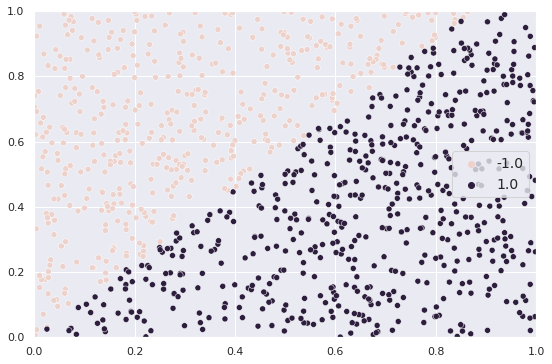

In [7]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test_hat)
plt.legend(fontsize=14)
ax.set_xlim((0, 1))
ax.set_ylim((0, 1))

#### Q2: (5 points)

Repeat the steps above except using Hinge loss.

In [8]:
# Train
W_HINGE = W.copy()
N_EPOCHS = 10
LEARNING_RATE = .025
for epoch in range(N_EPOCHS):
  sum_loss = 0
  n_correct = 0
  for i in range(X_train.shape[0]):
    # extract row to train on
    _X = X_train[i, :]
    _y = y_train[i]
    # make prediction and evaluate
    _y_hat = y(_X, W_HINGE)
    _error = _y - _y_hat
    _correct = 1 if _error == 0 else 0
    _loss = loss(_y_hat, a=1)  # hinge loss
    sum_loss += _loss
    n_correct += _correct
    # update weights
    if _loss > 0 and _error == 0:
      W_HINGE = W_HINGE + LEARNING_RATE * _y * _X
    else:
      W_HINGE = W_HINGE + LEARNING_RATE * _error * _X
  n = X_train.shape[0]
  print(f"EPOCH {epoch+1}: mean loss={sum_loss/n}, accuracy={n_correct/n}")

print(f"final weights: {W}")

EPOCH 1: mean loss=0.1, accuracy=0.4
EPOCH 2: mean loss=0.4, accuracy=0.25
EPOCH 3: mean loss=0.7, accuracy=0.2
EPOCH 4: mean loss=1.7, accuracy=0.4
EPOCH 5: mean loss=1.6, accuracy=0.65
EPOCH 6: mean loss=1.6, accuracy=0.75
EPOCH 7: mean loss=1.6, accuracy=0.75
EPOCH 8: mean loss=1.6, accuracy=0.75
EPOCH 9: mean loss=1.6, accuracy=0.75
EPOCH 10: mean loss=1.6, accuracy=0.75
final weights: [[0.03623808 0.88258812]]


Evaluate accuracy on the test dataset.

In [9]:
y_test_hat = y(X_test, W_HINGE)[:, 0]
test_loss = np.mean(loss(y_test_hat))
correct_pred = np.isclose(y_test_hat, y_test)
test_accuracy = np.mean(correct_pred)
print(f"Test results: mean loss={test_loss}, accuracy={test_accuracy}")

Test results: mean loss=1.0, accuracy=0.726


Plot the test dataset colored by the predicted label.

(0.0, 1.0)

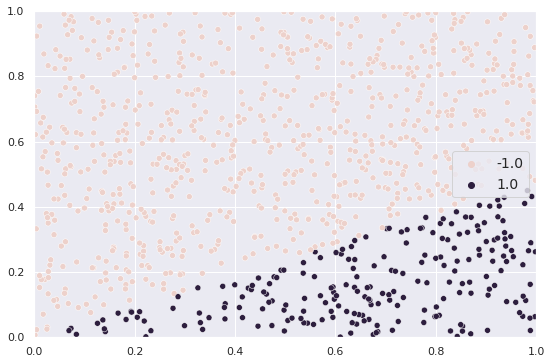

In [10]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test_hat)
plt.legend(fontsize=14)
ax.set_xlim((0, 1))
ax.set_ylim((0, 1))

#### Q3: (2 points)

I obtained better accuracy with the Perceptron model due to the fact that the training data was relatively stable in the sense that there wasn't a massive dividing gap between the two classes, allowing for a reasonable decision boundary to be applied to the test dataset.

#### Q4: (2 points)

I think that my Hinge loss algorithm would not change as much with new data points because the algorithm would still update weights and converge to a somewhat similar decision boundary as the weight updating continued for each epoch.

Since the same same learning rate, initial weights, and number of epochs was consistent across the two experiments, my only conclusion for the dramatic difference in weights based on the loss is that the Hinge loss updating weights even when the prediction was correct may have allowed for overfitting or going too far in one direction or the other.

### Problem 2: *Weight Initialization, Dead Neurons, Leaky ReLU* (30 points)

Import the necessary packages, check `tensorflow` version, and ensure GPU is available for training.

In [11]:
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, Model
from tensorflow.keras.utils import to_categorical

tf.__version__

'2.3.0'

In [12]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

#### Q1: (10 points)

The vanishing gradient phenomenon is when networks fail to learn due to gradients becoming extremely small and thus preventing weights from updating. This phenomenon varies greatly based on the activation function as well as the weight initialization mechanism.

Load and preprocess the data.

In [13]:
# Load and prepare MNIST dataset.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
x_train /= 255
x_test /= 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11493376/11490434 [==============================] - 0s 0us/step


Define a few helper functions for creating the model, compiling the model, and extracting activations.

In [14]:
def create_mlp_model(n_hidden_layers,
                     dim_layer,
                     input_shape,
                     n_classes,
                     kernel_initializer,
                     bias_initializer,
                     activation):
    """Create Multi-Layer Perceptron with given parameters."""
    model = Sequential()
    model.add(layers.Dense(dim_layer,
                           input_shape=input_shape,
                           kernel_initializer=kernel_initializer,
                           bias_initializer=bias_initializer))
    for i in range(n_hidden_layers):
        model.add(layers.Dense(dim_layer,
                               activation=activation,
                               kernel_initializer=kernel_initializer,
                               bias_initializer=bias_initializer))
    model.add(layers.Dense(n_classes,
                           activation='softmax',
                           kernel_initializer=kernel_initializer,
                           bias_initializer=bias_initializer))
    return model

def compile_model(model):
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.RMSprop(),
                  metrics=['accuracy'])
    return model

def get_activations(model, x, mode=0.0):
    """Extract activations with given model and input vector x."""
    outputs = [layer.output for layer in model.layers]
    activations = tf.keras.backend.function([model.input], outputs)
    output_elts = activations([x, mode])
    return output_elts

Run the expirements with a few different sigmas and activations.

In [15]:
def run_expirement(sigmas,
                   activation,
                   initializer,
                   n_hidden_layers=5,
                   dim_layer=100,
                   input_shape=(784, ),
                   n_classes=10,
                   seed=10):
  # Run the data through a few MLP models and save the activations from
  # each layer into a Pandas DataFrame.
  rows = []
  for stddev in sigmas:
    if initializer == 'normal':
      init = tf.initializers.RandomNormal(mean=0.0,
                                          stddev=stddev,
                                          seed=seed)
    elif initializer == 'xavier':
      init = tf.keras.initializers.GlorotNormal(seed=seed)
    elif initializer == 'he':
      init = tf.keras.initializers.HeNormal(seed=seed)
    else:
      raise NotImplementedError

    model = create_mlp_model(n_hidden_layers,
                              dim_layer,
                              input_shape,
                              n_classes,
                              init,
                              'zeros',
                              activation)
    compile_model(model)
    output_elts = get_activations(model, x_test)
    n_layers = len(model.layers)
    i_output_layer = n_layers - 1

    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.ravel()[::20]:
                rows.append([i, stddev, out_i])

  df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])
  return df

In [16]:
sigmas=[0.05, 0.10, 0.20]
df_normal_tanh = run_expirement(sigmas=sigmas,
                                activation='tanh',
                                initializer='normal')
df_normal_tanh.head()

,Hidden Layer,Standard Deviation,Output
0,1,0.05,0.471986
1,1,0.05,0.217645
2,1,0.05,-0.019485
3,1,0.05,-0.011170
4,1,0.05,-0.464690


Create functions for plotting activations.

In [17]:
from matplotlib import rcParamsDefault

def grid_axes_it(n_plots, n_cols=3, enumerate=False, fig=None):
    """
    Iterate through Axes objects on a grid with n_cols columns and as many
    rows as needed to accommodate n_plots many plots.
    Args:
        n_plots: Number of plots to plot onto figure.
        n_cols: Number of columns to divide the figure into.
        fig: Optional figure reference.
    Yields:
        n_plots many Axes objects on a grid.
    """

    n_rows = n_plots / n_cols + int(n_plots % n_cols > 0)

    if not fig:
      default_figsize = rcParamsDefault['figure.figsize']
      fig = plt.figure(figsize=(
          default_figsize[0] * n_cols,
          default_figsize[1] * n_rows
      ))

    for i in range(1, n_plots + 1):
      ax = plt.subplot(n_rows, n_cols, i)
      yield ax

def plot_weights(df, sigmas, activation, initializer):
  # Plot previously saved activations from the 5 hidden layers
  # using different initialization schemes.
  fig = plt.figure(figsize=(12, 6))
  axes = grid_axes_it(len(sigmas), 1, fig=fig)

  for sig in sigmas:
    ax = next(axes)
    ddf = df[df['Standard Deviation'] == sig]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')

    if initializer == 'normal':
      ax.set_title('Weights Drawn from $N(\mu = 0, \sigma = {%.2f})$' % sig, fontsize=13)
    elif initializer == 'xavier':
      ax.set_title('Weights Drawn from Xavier Normal', fontsize=13)
    else:
      ax.set_title('')

    if len(sigmas) > 1:
      if sig == sigmas[1]:
          ax.set_ylabel(f"{activation} Neuron Outputs")
      if sig != sigmas[-1]:
          ax.set_xticklabels(())
      else:
          ax.set_xlabel("Hidden Layer")
    else:
      ax.set_ylabel(f"{activation} Neuron Outputs")
      ax.set_xlabel("Hidden Layer")

  plt.tight_layout()
  plt.show()

Begin plotting activations for each initializer + activation combination expirement.

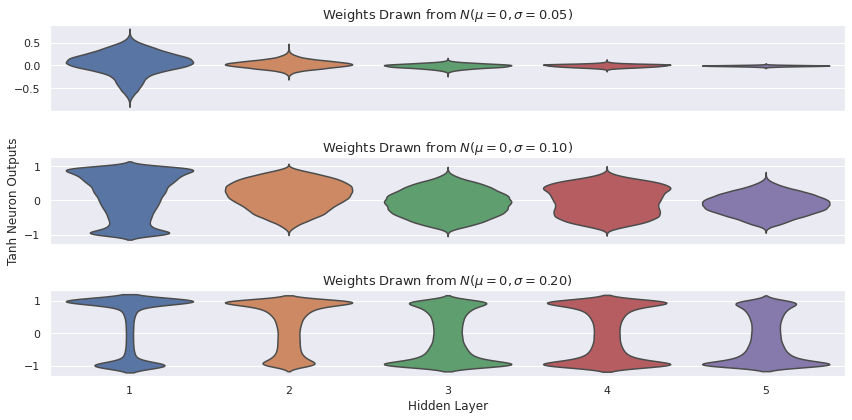

In [18]:
plot_weights(df_normal_tanh, sigmas, 'Tanh', 'normal')

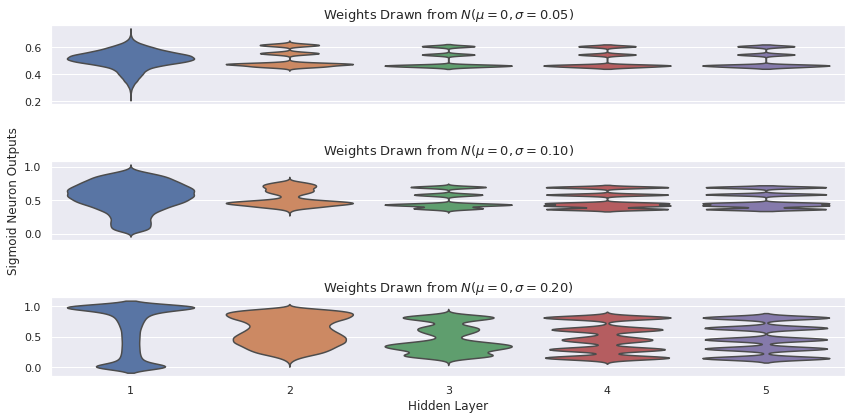

In [19]:
df_normal_sigmoid = run_expirement(sigmas=sigmas,
                                   activation='sigmoid',
                                   initializer='normal')
plot_weights(df_normal_sigmoid, sigmas, 'Sigmoid', 'normal')

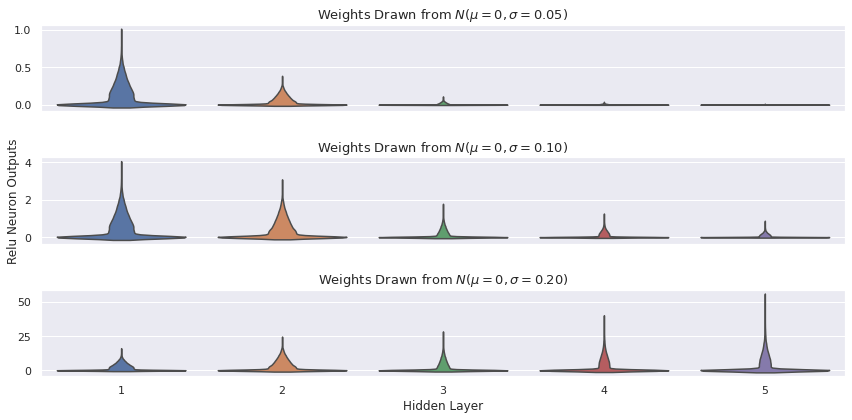

In [20]:
df_normal_relu = run_expirement(sigmas=sigmas,
                                activation='relu',
                                initializer='normal')
plot_weights(df_normal_relu, sigmas, 'Relu', 'normal')

Repeat the same activations experiment but with Xaviar a.k.a. Glorot Normal initializations.

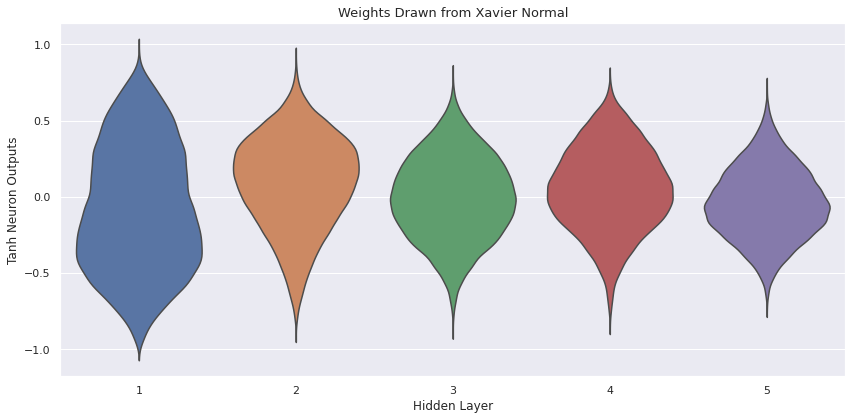

In [21]:
df_xavier_tanh = run_expirement(sigmas=['1.0'],
                                activation='tanh',
                                initializer='xavier')
plot_weights(df_xavier_tanh, ['1.0'], 'Tanh', 'xavier')

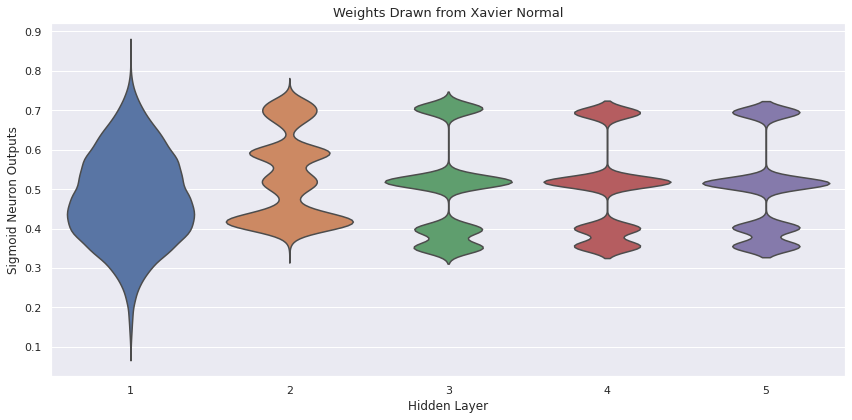

In [22]:
df_xavier_sigmoid = run_expirement(sigmas=['1.0'],
                                  activation='sigmoid',
                                  initializer='xavier')
plot_weights(df_xavier_sigmoid, ['1.0'], 'Sigmoid', 'xavier')

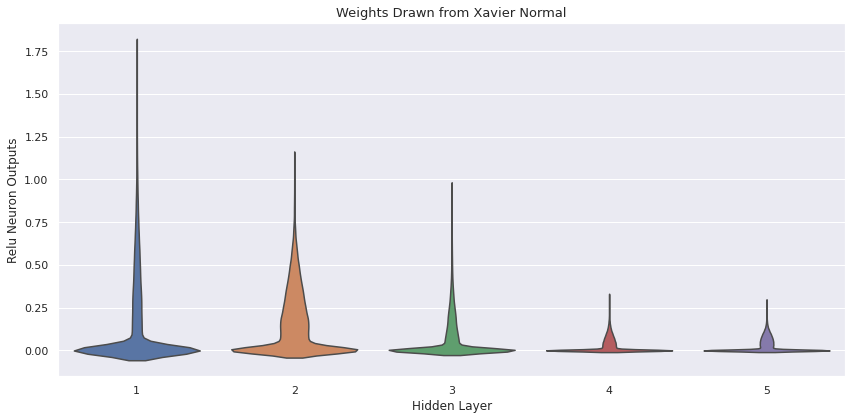

In [23]:
df_xavier_relu = run_expirement(sigmas=['1.0'],
                                activation='relu',
                                initializer='xavier')
plot_weights(df_xavier_relu, ['1.0'], 'Relu', 'xavier')

Show that He initialization works best for ReLU activations.

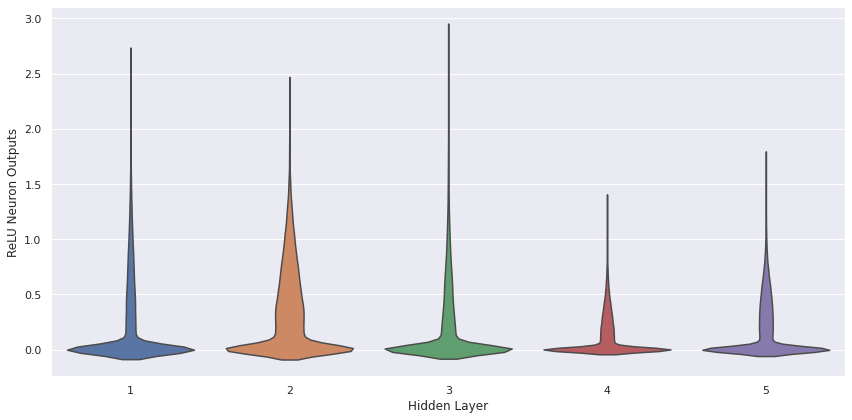

In [24]:
df_he_relu = run_expirement(sigmas=['1.0'],
                            activation='relu',
                            initializer='he')
plot_weights(df_he_relu, ['1.0'], 'ReLU', 'he')

From above, we can see that the ReLU activations for each hidden layer of our network are better suited for learning when we initialize with He as opposed to Random Normal or Xavier.

#### Q2: (10 points)

Using $f(x)=|x|$ as the function.

In [25]:
def get_model(model_i, n_layers = 10):
  
  # define model
  inputs = layers.Input(shape=(1,), dtype='float32', name=f'input_{model_i}')
  x = layers.Dense(2, activation='relu', name=f'dense_{model_i}_0')(inputs)
  for i in range(1, n_layers):
    x = layers.Dense(2, activation='relu', name=f'dense_{model_i}_{i}')(x)
  outputs = layers.Dense(1, name=f'output_{model_i}')(x)
  model = Model(inputs=inputs, outputs=outputs, name=f"sim_model_{model_i}")

  # compile
  model.compile(loss='mse',
                optimizer='adam')
  
  # return
  return model

In [26]:
from tqdm import tqdm

# Define simulation variables
n_train = 3000
n_test = 1000
n_sims = 1000
collapsed_counter = 0

for i in tqdm(range(n_sims), total=n_sims):

  # draw data
  X_train = np.random.uniform(low=-np.sqrt(7), high=np.sqrt(7), size=(n_train))
  y_train = np.abs(X_train)

  X_test = np.random.uniform(low=-np.sqrt(7), high=np.sqrt(7), size=(n_test))

  # fetch model
  model = get_model(f'{i}')

  # fit
  _ = model.fit(x=X_train,
                y=y_train,
                epochs=2,
                batch_size=64,
                verbose=0)
  # predict
  y_pred = model.predict(X_test)

  # evaluate collapse
  if np.var(y_pred) <= 10e-4:
    collapsed_counter += 1

100%|██████████| 1000/1000 [15:51<00:00,  1.05it/s]


In [27]:
print(f"Percentage of simulations that collapsed: {collapsed_counter / n_sims}")

Percentage of simulations that collapsed: 0.964


#### Q3: (10 points)

Using LeakyReLU instead of ReLU.

In [28]:
def get_model(model_i, n_layers = 10):
  
  # define model
  inputs = layers.Input(shape=(1,), dtype='float32', name=f'input_{model_i}')
  x = layers.Dense(2, name=f'dense_{model_i}_0')(inputs)
  x = layers.LeakyReLU(alpha=0.01, name=f'leaky_relu_{model_i}_0')(x)
  for i in range(1, n_layers):
    x = layers.Dense(2, name=f'dense_{model_i}_{i}')(x)
    x = layers.LeakyReLU(alpha=0.01, name=f'leaky_relu_{model_i}_{i}')(x)
  outputs = layers.Dense(1, name=f'output_{model_i}')(x)
  model = Model(inputs=inputs, outputs=outputs, name=f"sim_model_{model_i}")

  # compile
  model.compile(loss='mse',
                optimizer='adam')
  
  # return
  return model

Run experiment again.

In [29]:
from tqdm import tqdm

# Define simulation variables
n_train = 3000
n_test = 1000
n_sims = 1000
collapsed_counter = 0

for i in tqdm(range(n_sims), total=n_sims):

  # draw data
  X_train = np.random.uniform(low=-np.sqrt(7), high=np.sqrt(7), size=(n_train))
  y_train = np.abs(X_train)

  X_test = np.random.uniform(low=-np.sqrt(7), high=np.sqrt(7), size=(n_test))

  # fetch model
  model = get_model(f'{i}')

  # fit
  _ = model.fit(x=X_train,
                y=y_train,
                epochs=2,
                batch_size=64,
                verbose=0)
  # predict
  y_pred = model.predict(X_test)

  # evaluate collapse
  if np.var(y_pred) <= 10e-4:
    collapsed_counter += 1

100%|██████████| 1000/1000 [15:30<00:00,  1.08it/s]


In [30]:
print(f"Percentage of simulations that collapsed: {collapsed_counter / n_sims}")

Percentage of simulations that collapsed: 0.955


Changing the activation function from ReLU to LeakyReLU lead to a reduction in the percentage of networks that dropped out from 96.4% to 95.5%.

### Problem 3: *Batch Normalization, Dropout, MNIST* (25 points)

#### Q1: (5 points)

Co-adaption is the observed behavior of neurons becoming highly correlated, as opposed to the desired behavior of neurons learning unique features/representations of the data independently of the other neurons in the network. 

Internal covariance-shift is the phenomenom where the distribution of each neural network layer's input changes during training as the parameters of the previous layers are changing. This leads to difficulties in training such as increased training time and saturating weights.

Co-adaption can be alleviated by implementing dropout, or the practice of randomly droping connections in the network during training so that individual neurons become less correlated to others.

Internal covariance-shift can be solved by using normalization techniques in networks so that dramatic changes in input distributions are minimized.

#### Q2: (5 points)

Load and preprocess the data.


In [31]:
# Load dataset as train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Set numeric type to float32 from uint8
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize value to [0, 1]
x_train /= 255
x_test /= 255

# Transform lables to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(f"training: {x_train.shape, y_train.shape}")
print(f"testing: {x_test.shape, y_test.shape}")

training: ((60000, 28, 28, 1), (60000, 10))
testing: ((10000, 28, 28, 1), (10000, 10))


Create the model with standard normalization for input and batch normalization for hidden layers. Note that we will perform standard normalization on the entire training feature set and pass to `model.fit(...)`.

In [32]:
def create_model(model_name):
  """ Function to create the model """

  # Input layer of shape 28x28x1, making the assumption that
  # the training data has been normalized
  inputs = layers.Input(shape=(28, 28, 1), dtype='float32')

  # First convolution block
  x = layers.Conv2D(filters=6,
                    kernel_size=(5, 5),
                    strides=(1, 1),
                    activation='tanh',
                    padding='same')(inputs)
  x = layers.BatchNormalization()(x)
  x = layers.AveragePooling2D(pool_size=(2, 2),
                              strides=(2, 2),
                              padding='valid')(x)

  # Second convolution block
  x = layers.Conv2D(filters=16,
                    kernel_size=(5, 5),
                    strides=(1, 1),
                    activation='tanh',
                    padding='valid')(x)
  x = layers.BatchNormalization()(x)
  x = layers.AveragePooling2D(pool_size=(2, 2),
                              strides=(2, 2),
                              padding='valid')(x)
  
  # Fully connected convolution layer
  x = layers.Conv2D(filters=120,
                    kernel_size=(5, 5),
                    strides=(1, 1),
                    activation='tanh',
                    padding='valid')(x)
  x = layers.BatchNormalization()(x)

  # Flatten and create dense layer
  x = layers.Flatten()(x)
  x = layers.Dense(84, activation='tanh')(x)
  x = layers.BatchNormalization()(x)

  # Output layer with softmax probability activation
  outputs = layers.Dense(10, activation='softmax')(x)

  # Create the model and return
  model = Model(inputs=inputs, outputs=outputs, name=model_name)
  return model

Fetch model and compile.

In [33]:
model = create_model(model_name='lenet5_q2')
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='SGD',
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "lenet5_q2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 6)         24        
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 16)        64        
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0 

Train the model.

In [35]:
history = model.fit(x=x_train,
                    y=y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_test, y_test),
                    verbose=1)

Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3003 - accuracy: 0.9157 - val_loss: 0.1869 - val_accuracy: 0.9518
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1406 - accuracy: 0.9613 - val_loss: 0.1071 - val_accuracy: 0.9691
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1012 - accuracy: 0.9722 - val_loss: 0.0939 - val_accuracy: 0.9719
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0823 - accuracy: 0.9768 - val_loss: 0.0716 - val_accuracy: 0.9790
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0704 - accuracy: 0.9798 - val_loss: 0.0663 - val_accuracy: 0.9799
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0619 - accuracy: 0.9828 - val_loss: 0.0614 - val_accuracy: 0.9811
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0563 - accuracy: 0.9840 - val_loss: 0.0563 - val_accuracy: 0.9823
Epoch 

Extract the `BatchNormalization` parameters.

In [36]:
batch_norm_l1 = model.get_layer('batch_normalization')
batch_norm_l1.weights

[<tf.Variable 'batch_normalization/gamma:0' shape=(6,) dtype=float32, numpy=
 array([1.108967 , 1.1376755, 1.1153715, 1.109371 , 1.0991311, 1.1178248],
       dtype=float32)>,
 <tf.Variable 'batch_normalization/beta:0' shape=(6,) dtype=float32, numpy=
 array([ 0.08298714, -0.12494694, -0.00522087, -0.17177102,  0.03814475,
         0.17646518], dtype=float32)>,
 <tf.Variable 'batch_normalization/moving_mean:0' shape=(6,) dtype=float32, numpy=
 array([ 0.11151974,  0.00777617,  0.12206826, -0.19983253,  0.032581  ,
         0.16135564], dtype=float32)>,
 <tf.Variable 'batch_normalization/moving_variance:0' shape=(6,) dtype=float32, numpy=
 array([0.04412563, 0.01540599, 0.03756188, 0.06345623, 0.02617932,
        0.05835752], dtype=float32)>]

In [37]:
batch_norm_l2 = model.get_layer('batch_normalization_1')
batch_norm_l2.weights

[<tf.Variable 'batch_normalization_1/gamma:0' shape=(16,) dtype=float32, numpy=
 array([1.0114062 , 1.008482  , 1.0783484 , 1.0162758 , 1.0590805 ,
        1.0110462 , 1.0345273 , 1.0134326 , 1.0486623 , 0.9989423 ,
        1.0017782 , 1.0112532 , 0.9990004 , 1.0186747 , 0.98921686,
        0.99707156], dtype=float32)>,
 <tf.Variable 'batch_normalization_1/beta:0' shape=(16,) dtype=float32, numpy=
 array([ 0.00273658,  0.00704004, -0.00716976, -0.00265493, -0.0044149 ,
        -0.00388615,  0.00027793,  0.00052903,  0.00173613,  0.00422226,
        -0.00022892,  0.001738  , -0.00616914,  0.00495842, -0.00731838,
        -0.00695912], dtype=float32)>,
 <tf.Variable 'batch_normalization_1/moving_mean:0' shape=(16,) dtype=float32, numpy=
 array([-0.42669147,  0.01923572,  0.02214402, -0.3108521 , -0.07051773,
         0.02000654, -0.02511648, -0.1387358 ,  0.2874183 ,  0.14744405,
         0.28714594, -0.18078786, -0.1993808 ,  0.13708894, -0.13451429,
        -0.33812344], dtype=float32)

In [38]:
batch_norm_l3 = model.get_layer('batch_normalization_2')
batch_norm_l3.weights

[<tf.Variable 'batch_normalization_2/gamma:0' shape=(120,) dtype=float32, numpy=
 array([1.0009441 , 1.0133185 , 1.0006331 , 1.0111028 , 1.0033128 ,
        1.0053468 , 1.0067818 , 1.0086329 , 1.003469  , 1.0090749 ,
        1.0071456 , 1.0018097 , 1.000537  , 1.005702  , 1.0095865 ,
        1.0042341 , 1.0029762 , 1.000822  , 0.9983    , 1.0012542 ,
        1.0088155 , 1.0034921 , 1.0042007 , 1.0021955 , 1.014903  ,
        1.000489  , 1.0018485 , 0.9839416 , 1.0019593 , 1.0143912 ,
        1.0020971 , 0.99621093, 0.99894893, 1.005754  , 0.994907  ,
        1.0064272 , 0.995957  , 0.9923979 , 1.0236624 , 1.0000834 ,
        1.0049076 , 0.9967999 , 0.9950786 , 1.0054556 , 1.0054352 ,
        0.9995755 , 1.0056927 , 1.0149511 , 1.0050769 , 1.0151627 ,
        0.99497896, 1.0122664 , 0.9996117 , 1.0000554 , 0.9978414 ,
        1.0014286 , 0.99443865, 1.0041919 , 0.9995168 , 0.99633825,
        0.9991428 , 1.009997  , 0.99739474, 1.0061314 , 1.0025321 ,
        0.9936187 , 1.0136948 , 1.0

In [39]:
batch_norm_l4 = model.get_layer('batch_normalization_3')
batch_norm_l4.weights

[<tf.Variable 'batch_normalization_3/gamma:0' shape=(84,) dtype=float32, numpy=
 array([1.0516782, 1.0659019, 1.0537403, 1.0348704, 1.0078691, 1.0475285,
        1.0454537, 1.0260153, 1.0531768, 1.0501186, 1.0329614, 1.0268574,
        1.0501057, 1.0298755, 1.0279706, 1.0556641, 1.0505111, 1.0242501,
        1.0273995, 1.0366982, 1.0178984, 1.0496444, 1.0154448, 1.0476469,
        1.0241338, 1.0285833, 1.0491396, 1.0351979, 1.0222626, 1.0254668,
        1.0554547, 1.0511277, 1.0348164, 1.0566859, 1.0190879, 1.022906 ,
        1.0492136, 1.0197749, 1.0164747, 1.0389439, 1.0627677, 1.0497329,
        1.042764 , 1.007745 , 1.0664592, 1.0208659, 1.0252237, 1.0206918,
        1.0214777, 1.03384  , 1.0114452, 1.0407668, 1.0245973, 1.0428197,
        1.0345713, 1.0372071, 1.0421029, 1.0332282, 1.0400052, 1.0539715,
        1.0285815, 1.0533948, 1.0540774, 1.0654094, 1.039631 , 1.037192 ,
        1.0584068, 1.0590941, 1.0158095, 1.027868 , 1.0411265, 1.0168031,
        1.0260961, 1.0712929, 1.

From the four cells above we can see the parameters for each `BatchNormalization` layer in the network. It is important to note that there are `n` mean and variance values per layer where `n=# of filters` in the convolution block preceeding or `n=# of neurons` in the dense layers.

#### Q3 (5 points)

Altering the `create_model` function to include `BatchNormalization` for the input.

In [40]:
def create_model(model_name):
  """ Function to create the model """

  # Input layer of shape 28x28x1, making the assumption that
  # the training data has not been normalized
  inputs = layers.Input(shape=(28, 28, 1), dtype='float32')

  # Add batch normalization for the input
  x = layers.BatchNormalization()(inputs)

  # First convolution block
  x = layers.Conv2D(filters=6,
                    kernel_size=(5, 5),
                    strides=(1, 1),
                    activation='tanh',
                    padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.AveragePooling2D(pool_size=(2, 2),
                              strides=(2, 2),
                              padding='valid')(x)
  
  # Second convolution block
  x = layers.Conv2D(filters=16,
                    kernel_size=(5, 5),
                    strides=(1, 1),
                    activation='tanh',
                    padding='valid')(x)
  x = layers.BatchNormalization()(x)
  x = layers.AveragePooling2D(pool_size=(2, 2),
                              strides=(2, 2),
                              padding='valid')(x)
  
  # Fully connected convolution layer
  x = layers.Conv2D(filters=120,
                    kernel_size=(5, 5),
                    strides=(1, 1),
                    activation='tanh',
                    padding='valid')(x)
  x = layers.BatchNormalization()(x)

  # Flatten and create dense layer
  x = layers.Flatten()(x)
  x = layers.Dense(84, activation='tanh')(x)
  x = layers.BatchNormalization()(x)
  
  # Output layer with softmax probability activation
  outputs = layers.Dense(10, activation='softmax')(x)

  # Create the model and return
  model = Model(inputs=inputs, outputs=outputs, name=model_name)
  return model

Compile and train the model.

In [41]:
model = create_model(model_name='lenet5_q3')
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='SGD',
              metrics=['accuracy'])

In [42]:
model.summary()

Model: "lenet5_q3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 6)         24        
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
batch_normalization_6 (Batch (None, 10, 10, 16)        64

In [43]:
history = model.fit(x=x_train,
                    y=y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_test, y_test),
                    verbose=1)

Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2712 - accuracy: 0.9251 - val_loss: 0.1375 - val_accuracy: 0.9647
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1094 - accuracy: 0.9708 - val_loss: 0.0811 - val_accuracy: 0.9755
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0793 - accuracy: 0.9785 - val_loss: 0.0669 - val_accuracy: 0.9812
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0662 - accuracy: 0.9823 - val_loss: 0.0558 - val_accuracy: 0.9836
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0572 - accuracy: 0.9843 - val_loss: 0.0623 - val_accuracy: 0.9818
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0512 - accuracy: 0.9859 - val_loss: 0.0496 - val_accuracy: 0.9854
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0464 - accuracy: 0.9873 - val_loss: 0.0440 - val_accuracy: 0.9865
Epoch 

Extract the learned `BatchNormalization` parameters and plot their distribution.

In [44]:
# get layers
batch_norm_inputs = model.get_layer('batch_normalization_4')
batch_norm_l1 = model.get_layer('batch_normalization_5')
batch_norm_l2 = model.get_layer('batch_normalization_6')
batch_norm_l3 = model.get_layer('batch_normalization_7')
batch_norm_l4 = model.get_layer('batch_normalization_8')

# get weights
inputs_mean = batch_norm_inputs.get_weights()[2]
inputs_var = batch_norm_inputs.get_weights()[3]
l1_mean = batch_norm_l1.get_weights()[2]
l1_var = batch_norm_l1.get_weights()[3]
l2_mean = batch_norm_l2.get_weights()[2]
l2_var = batch_norm_l2.get_weights()[3]
l3_mean = batch_norm_l3.get_weights()[2]
l3_var = batch_norm_l3.get_weights()[3]
l4_mean = batch_norm_l4.get_weights()[2]
l4_var = batch_norm_l4.get_weights()[3]

# create plot structure
df = pd.DataFrame(data={
    'layer': ['input']*2 + ['block1'] * 12 + ['block2'] * 32 + ['block3'] * 240 + ['dense'] * 168,
    'parameter': ['mean', 'var'] + ['mean'] * 6 + ['var'] * 6 + ['mean'] * 16 + ['var'] * 16 + ['mean'] * 120 + ['var'] * 120 + ['mean'] * 84 + ['var'] * 84,
    'value': np.concatenate((inputs_mean, inputs_var, l1_mean, l1_var, l2_mean, l2_var, l3_mean, l3_var, l4_mean, l4_var))})

df.head()

,layer,parameter,value
0,input,mean,0.130619
1,input,var,0.094901
2,block1,mean,0.069000
3,block1,mean,-0.187078
4,block1,mean,-0.147874


Text(0.5, 1.0, 'Batch Normalization Parameters by Layer')

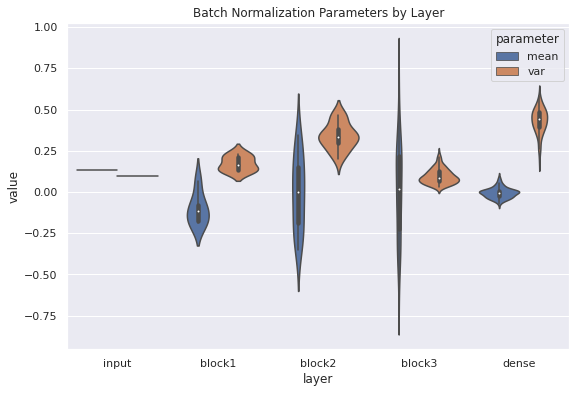

In [45]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.violinplot(x='layer', y='value', hue='parameter', data=df)
ax.set_title('Batch Normalization Parameters by Layer')

Both the train and test accuracy and loss metrics are better with the `BatchNormalization` applied to the input, and thus improved performance. The markdown table comparing the two is below.

| Input Normalization | Hidden Layer Normalization | Input Dropout | Hidden Layer Dropout | Train Accuracy | Train Loss | Test Accuracy | Test Loss |
|----------|-------|----|----|--------|--------|-------|--------|
| Standard | Batch | NA | NA | 0.9875 | 0.0436 | 0.9865 | 0.0440 |
| Batch | Batch | NA | NA | 0.9900 | 0.0368 | 0.9858 | 0.0444 |

#### Q4: (5 points)

Altering the `create_model` function to exclude `BatchNormalization` throughout the network but to include `Dropout` for both the input and the hidden layers.

In [46]:
def create_model(model_name):
  """ Function to create the model """

  # Input layer of shape 28x28x1, making the assumption that
  # the training data has not been normalized
  inputs = layers.Input(shape=(28, 28, 1), dtype='float32')

  # Add dropout for the input
  x = layers.Dropout(0.2)(inputs)

  # First convolution block
  x = layers.Conv2D(filters=6,
                    kernel_size=(5, 5),
                    strides=(1, 1),
                    activation='tanh',
                    padding='same')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.AveragePooling2D(pool_size=(2, 2),
                              strides=(2, 2),
                              padding='valid')(x)

  # Second convolution block
  x = layers.Conv2D(filters=16,
                    kernel_size=(5, 5),
                    strides=(1, 1),
                    activation='tanh',
                    padding='valid')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.AveragePooling2D(pool_size=(2, 2),
                              strides=(2, 2),
                              padding='valid')(x)

  # Fully connected convolution layer
  x = layers.Conv2D(filters=120,
                    kernel_size=(5, 5),
                    strides=(1, 1),
                    activation='tanh',
                    padding='valid')(x)
  x = layers.Dropout(0.5)(x)

  # Flatten and create dense layer
  x = layers.Flatten()(x)
  x = layers.Dense(84, activation='tanh')(x)
  x = layers.Dropout(0.5)(x)
  
  # Output layer with softmax probability activation
  outputs = layers.Dense(10, activation='softmax')(x)

  # Create the model and return
  model = Model(inputs=inputs, outputs=outputs, name=model_name)
  return model

Compile and train the model.

In [47]:
model = create_model(model_name='lenet5_q4')
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='SGD',
              metrics=['accuracy'])

In [48]:
model.summary()

Model: "lenet5_q4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 6)         0         
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 10, 16)        0 

In [49]:
history = model.fit(x=x_train,
                    y=y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_test, y_test),
                    verbose=1)

Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 1.6462 - accuracy: 0.4758 - val_loss: 0.7101 - val_accuracy: 0.8364
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.8200 - accuracy: 0.7440 - val_loss: 0.4343 - val_accuracy: 0.8853
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.6656 - accuracy: 0.7901 - val_loss: 0.3608 - val_accuracy: 0.8980
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5951 - accuracy: 0.8138 - val_loss: 0.3239 - val_accuracy: 0.9069
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5473 - accuracy: 0.8288 - val_loss: 0.3030 - val_accuracy: 0.9099
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5232 - accuracy: 0.8369 - val_loss: 0.2825 - val_accuracy: 0.9151
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4971 - accuracy: 0.8457 - val_loss: 0.2678 - val_accuracy: 0.9191
Epoch 

The updated table of our experiments is below.

| Input Normalization | Hidden Layer Normalization | Input Dropout | Hidden Layer Dropout | Train Accuracy | Train Loss | Test Accuracy | Test Loss |
|----------|-------|----|----|--------|--------|-------|--------|
| Standard | Batch | NA | NA | 0.9875 | 0.0436 | 0.9865 | 0.0440 |
| Batch | Batch | NA | NA | 0.9900 | 0.0368 | 0.9858 | 0.0444 |
| NA | NA | 0.2 | 0.5 | 0.8641 | 0.4396 | 0.9298 | 0.2300 |


#### Q5 (5 points)

Altering the `create_model` function to include `BatchNormalization` throughout the network as well as `Dropout` for both the input and the hidden layers.

In [50]:
def create_model(model_name):
  """ Function to create the model """

  # Input layer of shape 28x28x1, making the assumption that
  # the training data has not been normalized
  inputs = layers.Input(shape=(28, 28, 1), dtype='float32')

  # Add dropout and batch normalization for the input
  x = layers.Dropout(0.2)(inputs)
  x = layers.BatchNormalization()(x)

  # First convolution block
  x = layers.Conv2D(filters=6,
                    kernel_size=(5, 5),
                    strides=(1, 1),
                    activation='tanh',
                    padding='same')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.BatchNormalization()(x)
  x = layers.AveragePooling2D(pool_size=(2, 2),
                              strides=(2, 2),
                              padding='valid')(x)

  # Second convolution block
  x = layers.Conv2D(filters=16,
                    kernel_size=(5, 5),
                    strides=(1, 1),
                    activation='tanh',
                    padding='valid')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.BatchNormalization()(x)
  x = layers.AveragePooling2D(pool_size=(2, 2),
                              strides=(2, 2),
                              padding='valid')(x)

  # Fully connected convolution layer
  x = layers.Conv2D(filters=120,
                    kernel_size=(5, 5),
                    strides=(1, 1),
                    activation='tanh',
                    padding='valid')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.BatchNormalization()(x)

  # Flatten and create dense layer
  x = layers.Flatten()(x)
  x = layers.Dense(84, activation='tanh')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.BatchNormalization()(x)

  # Output layer with softmax probability activation
  outputs = layers.Dense(10, activation='softmax')(x)

  # Create the model and return
  model = Model(inputs=inputs, outputs=outputs, name=model_name)
  return model

Compile and train model.

In [51]:
model = create_model(model_name='lenet5_q4')
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='SGD',
              metrics=['accuracy'])

In [52]:
model.summary()

Model: "lenet5_q4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
dropout_6 (Dropout)          (None, 28, 28, 6)         0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 28, 6)         24        
_________________________________________________________________
average_pooling2d_6 (Average (None, 14, 14, 6)         0 

In [53]:
history = model.fit(x=x_train,
                    y=y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_test, y_test),
                    verbose=1)

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 1.0187 - accuracy: 0.6682 - val_loss: 0.3540 - val_accuracy: 0.8951
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.6524 - accuracy: 0.7944 - val_loss: 0.2893 - val_accuracy: 0.9118
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.5474 - accuracy: 0.8293 - val_loss: 0.2339 - val_accuracy: 0.9293
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4643 - accuracy: 0.8567 - val_loss: 0.1881 - val_accuracy: 0.9426
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3998 - accuracy: 0.8766 - val_loss: 0.1599 - val_accuracy: 0.9512
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3653 - accuracy: 0.8885 - val_loss: 0.1432 - val_accuracy: 0.9563
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3343 - accuracy: 0.8973 - val_loss: 0.1283 - val_accuracy: 0.9616
Epoch 

The final performance metric table for our experiments is below.

| Input Normalization | Hidden Layer Normalization | Input Dropout | Hidden Layer Dropout | Train Accuracy | Train Loss | Test Accuracy | Test Loss |
|----------|-------|----|----|--------|--------|-------|--------|
| Standard | Batch | NA | NA | 0.9875 | 0.0436 | 0.9865 | 0.0440 |
| Batch | Batch | NA | NA | 0.9900 | 0.0368 | 0.9858 | 0.0444 |
| NA | NA | 0.2 | 0.5 | 0.8641 | 0.4396 | 0.9298 | 0.2300 |
| Batch | Batch | 0.2 | 0.5 | 0.9127 | 0.2859 | 0.9661 | 0.1074 |


From these experiments, where each model was trained for only 10 epochs, the network with no `Dropout` and `BatchNormalization` for both input and hidden layers performed the best.  The networks with dropout took longer to learn and based on the validation accuracy being higher than the training accuracy, they still had the capacity to learn without overfitting. However, in the spirit of fairness and replicating the [blog post](https://engmrk.com/lenet-5-a-classic-cnn-architecture/), the best model for our trials was the second model.

### Problem 4: *Learning Rate, Batch Size, FashionMNIST* (30 points)

#### Q1: (3 points)

Loading FashionMNIST and summarizing.

In [54]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print('\n ----- \n')
print(f"Number of training records: {len(train_images)}")
print(f"Number of test records: {len(test_images)}")
print(f"Total number of records: {len(train_images) + len(test_images)}")

4423680/4422102 [==============================] - 0s 0us/step

 ----- 

Number of training records: 60000
Number of test records: 10000
Total number of records: 70000


In [55]:
train_labels_pd_series = pd.Series(train_labels)
print(f"Number of unique classes: {train_labels_pd_series.nunique()}")
print('Number of images per class in the training dataset:')
train_labels_pd_series.value_counts()

Number of unique classes: 10
Number of images per class in the training dataset:


9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

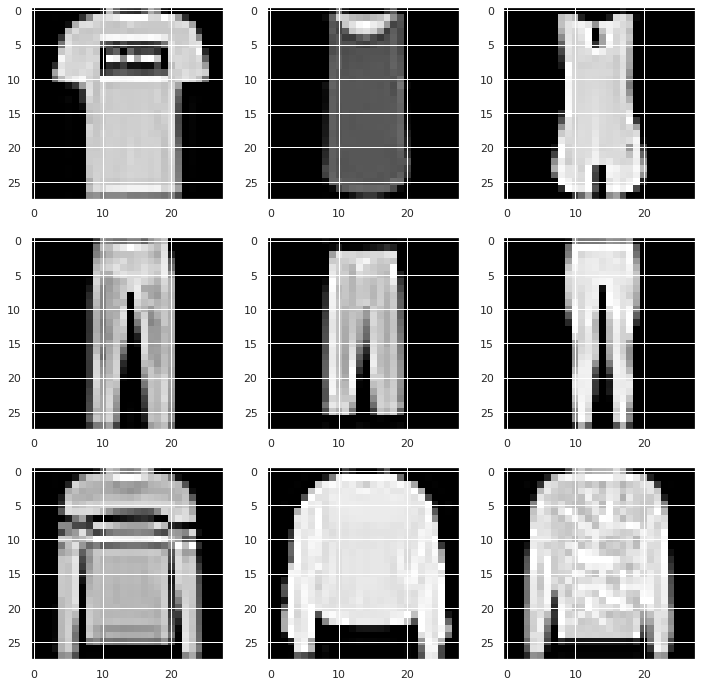

In [56]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
for i in range(3):
  subset_imgs = train_images[train_labels == i, :, :]
  for j in range(3):
    ax[i, j].imshow(subset_imgs[j, :, :], cmap='gray')

In [57]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#### Q2: (5 Points)

Using LeNet and experimenting with various learning rates. Note: using LeNet with `BatchNormalization` on input and hidden layers.

In [58]:
def create_model(model_name):
  """ Function to create the model """

  # Input layer of shape 28x28x1, making the assumption that
  # the training data has not been normalized
  inputs = layers.Input(shape=(28, 28, 1), dtype='float32')

  # Add batch normalization for the input
  x = layers.BatchNormalization()(inputs)

  # First convolution block
  x = layers.Conv2D(filters=6,
                    kernel_size=(5, 5),
                    strides=(1, 1),
                    activation='tanh',
                    padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.AveragePooling2D(pool_size=(2, 2),
                              strides=(2, 2),
                              padding='valid')(x)
  
  # Second convolution block
  x = layers.Conv2D(filters=16,
                    kernel_size=(5, 5),
                    strides=(1, 1),
                    activation='tanh',
                    padding='valid')(x)
  x = layers.BatchNormalization()(x)
  x = layers.AveragePooling2D(pool_size=(2, 2),
                              strides=(2, 2),
                              padding='valid')(x)
  
  # Fully connected convolution layer
  x = layers.Conv2D(filters=120,
                    kernel_size=(5, 5),
                    strides=(1, 1),
                    activation='tanh',
                    padding='valid')(x)
  x = layers.BatchNormalization()(x)

  # Flatten and create dense layer
  x = layers.Flatten()(x)
  x = layers.Dense(84, activation='tanh')(x)
  x = layers.BatchNormalization()(x)

  # Output layer with softmax probability activation
  outputs = layers.Dense(10, activation='softmax')(x)

  # Create the model and return
  model = Model(inputs=inputs, outputs=outputs, name=model_name)
  return model

In [59]:
training_loss_log = []
learning_rate_log = []

for i in tqdm(range(-9, 2)):
  lr = 10**i
  model = create_model(f'model_{i}')
  model.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
                metrics=['accuracy'])
  _ = model.fit(x=train_images,
                y=train_labels,
                batch_size=64,
                epochs=5,
                validation_data = (test_images, test_labels),
                verbose=0)
  training_loss_log.append(model.history.history['loss'][-1])
  learning_rate_log.append(lr)

100%|██████████| 11/11 [03:11<00:00, 17.37s/it]


[Text(0, 0.5, 'Training Loss'),
 None,
 Text(0.5, 0, 'Learning Rate'),
 Text(0.5, 1.0, 'Training Loss vs. Learning Rate')]

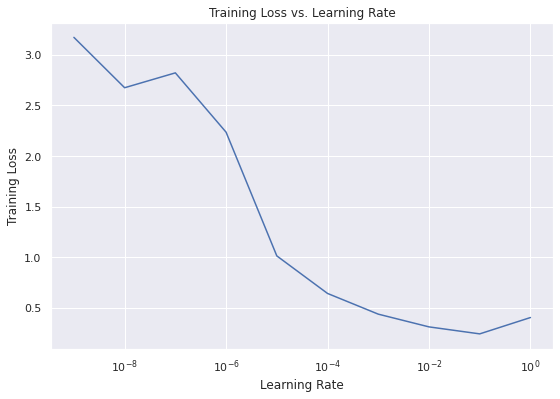

In [60]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(x=learning_rate_log, y=training_loss_log)
ax.set(ylabel='Training Loss',
       xlabel='Learning Rate',
       xscale='log',
       title='Training Loss vs. Learning Rate')

In [61]:
lr_max = 10**-9
lr_min = 10**-1

print(f"lr_max={lr_max}, lr_min={lr_min}")

lr_max=1e-09, lr_min=0.1


#### Q3: (5 points)

Pull in the `CyclicLR` class from the referenced [Github](https://github.com/bckenstler/CLR/blob/master/clr_callback.py).

In [62]:
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
import numpy as np

class CyclicLR(Callback):
    """This callback implements a cyclical learning rate policy (CLR).
    The method cycles the learning rate between two boundaries with
    some constant frequency, as detailed in this paper (https://arxiv.org/abs/1506.01186).
    The amplitude of the cycle can be scaled on a per-iteration or 
    per-cycle basis.
    This class has three built-in policies, as put forth in the paper.
    "triangular":
        A basic triangular cycle w/ no amplitude scaling.
    "triangular2":
        A basic triangular cycle that scales initial amplitude by half each cycle.
    "exp_range":
        A cycle that scales initial amplitude by gamma**(cycle iterations) at each 
        cycle iteration.
    For more detail, please see paper.
    
    # Example
        ```python
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., mode='triangular')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```
    
    Class also supports custom scaling functions:
        ```python
            clr_fn = lambda x: 0.5*(1+np.sin(x*np.pi/2.))
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., scale_fn=clr_fn,
                                scale_mode='cycle')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```    
    # Arguments
        base_lr: initial learning rate which is the
            lower boundary in the cycle.
        max_lr: upper boundary in the cycle. Functionally,
            it defines the cycle amplitude (max_lr - base_lr).
            The lr at any cycle is the sum of base_lr
            and some scaling of the amplitude; therefore 
            max_lr may not actually be reached depending on
            scaling function.
        step_size: number of training iterations per
            half cycle. Authors suggest setting step_size
            2-8 x training iterations in epoch.
        mode: one of {triangular, triangular2, exp_range}.
            Default 'triangular'.
            Values correspond to policies detailed above.
            If scale_fn is not None, this argument is ignored.
        gamma: constant in 'exp_range' scaling function:
            gamma**(cycle iterations)
        scale_fn: Custom scaling policy defined by a single
            argument lambda function, where 
            0 <= scale_fn(x) <= 1 for all x >= 0.
            mode paramater is ignored 
        scale_mode: {'cycle', 'iterations'}.
            Defines whether scale_fn is evaluated on 
            cycle number or cycle iterations (training
            iterations since start of cycle). Default is 'cycle'.
    """

    def __init__(self, base_lr=0.001, max_lr=0.006, step_size=2000., mode='triangular',
                 gamma=1., scale_fn=None, scale_mode='cycle'):
        super(CyclicLR, self).__init__()

        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        if scale_fn == None:
            if self.mode == 'triangular':
                self.scale_fn = lambda x: 1.
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = lambda x: 1/(2.**(x-1))
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = lambda x: gamma**(x)
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

        self._reset()

    def _reset(self, new_base_lr=None, new_max_lr=None,
               new_step_size=None):
        """Resets cycle iterations.
        Optional boundary/step size adjustment.
        """
        if new_base_lr != None:
            self.base_lr = new_base_lr
        if new_max_lr != None:
            self.max_lr = new_max_lr
        if new_step_size != None:
            self.step_size = new_step_size
        self.clr_iterations = 0.
        
    def clr(self):
        cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
        x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
        if self.scale_mode == 'cycle':
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(cycle)
        else:
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(self.clr_iterations)
        
    def on_train_begin(self, logs={}):
        logs = logs or {}

        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())        
            
    def on_batch_end(self, epoch, logs=None):
        
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        
        K.set_value(self.model.optimizer.lr, self.clr())

Set up experiment using $lr_{max}$ and $lr_{min}$ with cyclical learning rate policy with exponential decay.

In [63]:
clr = CyclicLR(base_lr=lr_min,
               max_lr=lr_max,
               step_size=10**3,
               mode='exp_range',
               gamma=0.99994)

In [64]:
model = create_model('clr_exp_decay')
model.summary()

Model: "clr_exp_decay"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
batch_normalization_69 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
batch_normalization_70 (Batc (None, 28, 28, 6)         24        
_________________________________________________________________
average_pooling2d_30 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
batch_normalization_71 (Batc (None, 10, 10, 16)      

In [65]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(x=train_images,
                    y=train_labels,
                    batch_size=64,
                    epochs=5,
                    validation_data = (test_images, test_labels),
                    verbose=1,
                    callbacks=[clr])

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.4482 - accuracy: 0.8379 - val_loss: 0.3567 - val_accuracy: 0.8696
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.3338 - accuracy: 0.8763 - val_loss: 0.3908 - val_accuracy: 0.8560
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.3016 - accuracy: 0.8883 - val_loss: 0.2977 - val_accuracy: 0.8907
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.2594 - accuracy: 0.9035 - val_loss: 0.4130 - val_accuracy: 0.8443
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.2625 - accuracy: 0.9026 - val_loss: 0.2643 - val_accuracy: 0.9042


Plot Train/Validation Loss and Accuracy curves.

In [66]:
df_metrics = pd.DataFrame(data={
    'epoch': [i for i in range(1, 6)] * 4,
    'metric': ['accuracy'] * 5 + ['loss'] * 5 + ['val_accuracy'] * 5 + ['val_loss'] * 5,
    'value': history.history['accuracy'] + history.history['loss'] + history.history['val_accuracy'] + history.history['val_loss']
})

df_metrics.head()

,epoch,metric,value
0,1,accuracy,0.837950
1,2,accuracy,0.876250
2,3,accuracy,0.888300
3,4,accuracy,0.903500
4,5,accuracy,0.902633


[Text(0, 0.5, 'Metric'),
 Text(0.5, 0, 'Epoch'),
 Text(0.5, 1.0, 'CyclicLR w/Exp Decay Metrics')]

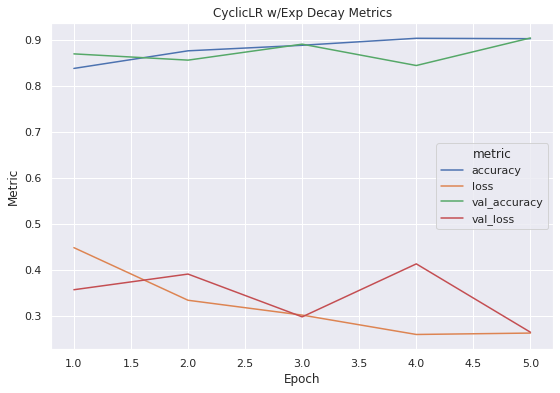

In [67]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(x='epoch', y='value', hue='metric', data=df_metrics)
ax.set(ylabel='Metric',
       xlabel='Epoch',
       title='CyclicLR w/Exp Decay Metrics')

#### Q4: (5 points)

Running similar experiment to the learning rate optimizer except for batch sizes.

In [68]:
training_loss_log = []
batch_size_log = []

for i in tqdm(range(6, 14)):
  bs = 2**i
  model = create_model(f'model_bs_{i}')
  model.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.SGD(learning_rate=lr_min),
                metrics=['accuracy'])
  _ = model.fit(x=train_images,
                y=train_labels,
                batch_size=bs,
                epochs=5,
                validation_data = (test_images, test_labels),
                verbose=0)
  training_loss_log.append(model.history.history['loss'][-1])
  batch_size_log.append(bs)

100%|██████████| 8/8 [00:56<00:00,  7.02s/it]


[Text(0, 0.5, 'Training Loss'),
 Text(0.5, 0, 'Batch Size'),
 Text(0.5, 1.0, 'Training Loss vs. Batch Size')]

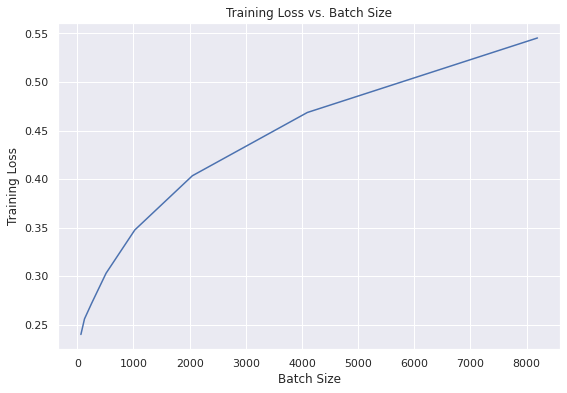

In [69]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(x=batch_size_log, y=training_loss_log)
ax.set(ylabel='Training Loss',
       xlabel='Batch Size',
       title='Training Loss vs. Batch Size')

This behavior is not similar to the learning rate behavior observed in part 2. This can be explained due to the fact that the network is making fewer updates to the weights as batch size increases, thus limiting learning over the 5 epochs.

#### Q5: (4 points)

From above, $b_{min}=64$ and $b_{max}=8192$. 

The algorithm for a cyclic batch size policy would look like:

```
cycle = np.floor(1+iterations/(2*step_size))
x = np.abs(iterations/step_size - 2*cycle + 1)
batch_size = base_batch_size + (max_batch_size-base_base_batch_size)*np.maximum(0, (1-x))*scale_fn(x)
```

This is extremely similar to the algorithm we implemented for cyclic learning rate, except now we are resetting the batch size as a Keras callback instead of the learning rate. In practice, however, we will be manually training per batch as dynamic batch resizing is not supported as a Keras callback at the time of this assignment.

A block diagram demonstrating the above algorithm is below.

<figure>
<center>
<img src='https://drive.google.com/uc?id=1Oq2bNC0UD-7fF7KfRT_tPs-wioA6dOHE' />
<figcaption>Cyclic Batch Size Block Diagram </figcaption></center>
</figure>

#### Q6: (6 points)

The analogous trajectory for cyclic batch size compared to the exponential decrease used for cyclic learning rate would be exponential increase. This makes sense, as each cycle completes for cyclic learning rate, we want to make smaller and smaller adjustments to the weights as a whole. For cyclic batch size, to achieve the same behavior with a fixed learning rate, we want to make fewer and fewer updates to the weights, which corresponsed to using growing batch sizes as the number of cycles increases.

Create `cyclic_bs` functionality.


In [73]:
def cyclic_bs(curr_batch_size,
              direction,
              cycle,
              min_batch_size=64,
              max_batch_size=8192):
  """ 
  Takes the current exponential factor for batch size and the direction of
  of movement (1 for up, 0 for down) and returns the next exponential factor
  for batch size
  """

  if direction:
    if curr_batch_size * 2 < max_batch_size:
      return int(curr_batch_size * 2), direction, cycle, min_batch_size, max_batch_size
    else:
      return max_batch_size, 0, cycle, min_batch_size, max_batch_size
  else:
    if curr_batch_size / 2 > min_batch_size:
      return int(curr_batch_size / 2), direction, cycle, min_batch_size, max_batch_size
    else:
      return min_batch_size, 1, cycle + 1, min_batch_size, int(max_batch_size * 2)

Run experiment with cyclical batch size.

In [74]:
model = create_model(model_name='model_bs')
model.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.SGD(learning_rate=lr_min),
                metrics=['accuracy'])

In an effort to prevent extreme exponential growth to the point where the batch size is greater than the training dataset size, I'm starting with a max exponential factor equal to 9, which we will exceed as we exponentially grow.

In [75]:
N_EPOCHS = 5
N_TRAINING_DATA = len(train_images)

acc_log = []
loss_log = []
val_acc_log = []
val_loss_log = []

min_batch_size = 2**6
max_batch_size = 2**9
batch_size = min_batch_size
cycle = 1
direction = 1

for i in range(1, 1+N_EPOCHS):
  print(f"epoch {i}...")
  
  # set batch info
  enough_for_batch = True
  batch_start_idx = 0
  batch_end_idx = batch_start_idx + batch_size
  
  while enough_for_batch:
    print(f"  batch size={batch_size}")

    # extract batch of training data
    X_train = train_images[batch_start_idx:batch_end_idx, :, :]
    y_train = train_labels[batch_start_idx:batch_end_idx, :]
    
    # train on batch
    metric_dict = model.train_on_batch(x=X_train,
                                       y=y_train,
                                       reset_metrics=False,
                                       return_dict=True)

    # update batch size via cyclic batch size algorithm
    batch_start_idx = batch_end_idx
    batch_size, direction, cycle, min_batch_size, max_batch_size = cyclic_bs(curr_batch_size=batch_size,
                                                                             direction=direction,
                                                                             cycle=cycle,
                                                                             min_batch_size=min_batch_size,
                                                                             max_batch_size=max_batch_size)
    batch_end_idx = batch_start_idx + batch_size

    # evaluate if there is enough data left to train on
    if batch_end_idx > N_TRAINING_DATA:
      enough_for_batch = False
  
  # extract metrics and update logs
  val_dict = model.evaluate(test_images, test_labels, return_dict=True, verbose=0)
  acc_log.append(metric_dict['accuracy'])
  loss_log.append(metric_dict['loss'])
  val_acc_log.append(val_dict['accuracy'])
  val_loss_log.append(val_dict['loss'])
  model.reset_metrics()

epoch 1...
  batch size=64
  batch size=128
  batch size=256
  batch size=512
  batch size=256
  batch size=128
  batch size=64
  batch size=128
  batch size=256
  batch size=512
  batch size=1024
  batch size=512
  batch size=256
  batch size=128
  batch size=64
  batch size=128
  batch size=256
  batch size=512
  batch size=1024
  batch size=2048
  batch size=1024
  batch size=512
  batch size=256
  batch size=128
  batch size=64
  batch size=128
  batch size=256
  batch size=512
  batch size=1024
  batch size=2048
  batch size=4096
  batch size=2048
  batch size=1024
  batch size=512
  batch size=256
  batch size=128
  batch size=64
  batch size=128
  batch size=256
  batch size=512
  batch size=1024
  batch size=2048
  batch size=4096
  batch size=8192
  batch size=4096
  batch size=2048
  batch size=1024
  batch size=512
  batch size=256
  batch size=128
  batch size=64
  batch size=128
  batch size=256
  batch size=512
  batch size=1024
  batch size=2048
  batch size=4096
epoch 2

Note that despite our best efforts, we still encountered epochs with very few weight updates due to the extremely large batch sizes that we exponentially grew in to.

In [76]:
df_metrics = pd.DataFrame(data={
    'epoch': [i for i in range(1, 6)] * 4,
    'metric': ['accuracy'] * 5 + ['loss'] * 5 + ['val_accuracy'] * 5 + ['val_loss'] * 5,
    'value': acc_log + loss_log + val_acc_log + val_loss_log
})

df_metrics.head()

,epoch,metric,value
0,1,accuracy,0.789227
1,2,accuracy,0.826673
2,3,accuracy,0.838928
3,4,accuracy,0.837684
4,5,accuracy,0.844462


[Text(0, 0.5, 'Metric'),
 Text(0.5, 0, 'Epoch'),
 Text(0.5, 1.0, 'Cyclic Batch Size w/Exp Decay Metrics')]

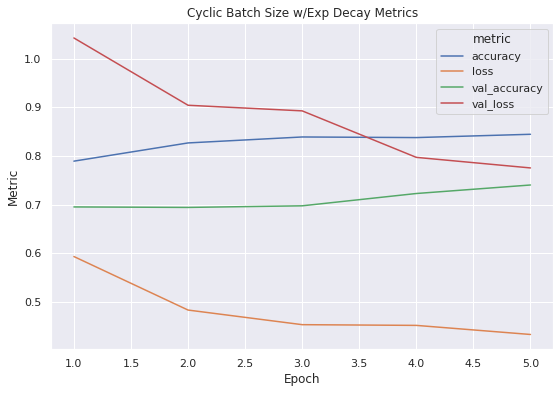

In [77]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(x='epoch', y='value', hue='metric', data=df_metrics)
ax.set(ylabel='Metric',
       xlabel='Epoch',
       title='Cyclic Batch Size w/Exp Decay Metrics')

#### Q7: (2 points)

From the metrics plots in Q3 and Q6, it can be seen that the Cyclic Learning Rate policy achieved greater train and validation loss and accuracy metrics than a Cyclic Batch Size policy.

The metric plot above in Q6 shows that the network still has the capacity to learn since the training loss is still significantly lower than the validation loss, compared to the Cyclic Learning Rate policy from Q3 that shows better metrics that were achieved much faster.